Twine Recruiting
Data Scientist – Project 0

Author: Wanda Wang

1. Explore the data set, making note of any interesting patterns or distributions.

Import libraries

In [1]:
import sys
sys.path.insert(0, "/anaconda/lib/python2.7/site-packages")
import os
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from __future__ import division
from scipy import stats
import seaborn as sns
os.chdir('/Users/wandawang/Desktop')
import re

Load in the data

In [2]:
feedback = pd.read_csv('feedback_clean.csv')
feedback.head(2)

,ID,Group,Feedback,Gender,IndustryPre,IndustryPost,Motivation_InfluencePower,Motivation_Achievement,Motivation_PersonalRelationships,Motivation_Wealth,Motivation_IntellectualStimulation,Introspective,Partner,Country
0,0,100,8.0,Male,Investment Management,Investment Management,4.0,5.0,1.0,3.0,2.0,5.0,Yes,India
1,1,100,NaN,Female,Mining,Consulting|Entrepreneurship / Startups|Technol...,5.0,2.0,3.0,4.0,1.0,8.0,No,Kyrgyzstan


Levels of Categorical Variables

In [3]:
for cat in ['Group', 'Feedback', 'Gender',\
     'IndustryPre', 'IndustryPost','Introspective','Motivation_InfluencePower',\
            'Partner', 'Country']:
    print("Number of levels in category '{0}': \b {1:2.2f} ".format\
          (cat, feedback[cat].unique().size))

Number of levels in category 'Group':  73.00 
Number of levels in category 'Feedback':  9.00 
Number of levels in category 'Gender':  2.00 
Number of levels in category 'IndustryPre':  187.00 
Number of levels in category 'IndustryPost':  221.00 
Number of levels in category 'Introspective':  11.00 
Number of levels in category 'Motivation_InfluencePower':  6.00 
Number of levels in category 'Partner':  2.00 
Number of levels in category 'Country':  68.00 


Industry has a combined 408 levels!

What are the dimensions, data types? 
How many values are missing?

In [4]:
feedback.shape #(583, 14)
print feedback.dtypes
feedback.isnull().sum()/len(feedback)

ID                                      int64
Group                                   int64
Feedback                              float64
Gender                                 object
IndustryPre                            object
IndustryPost                           object
Motivation_InfluencePower             float64
Motivation_Achievement                float64
Motivation_PersonalRelationships      float64
Motivation_Wealth                     float64
Motivation_IntellectualStimulation    float64
Introspective                         float64
Partner                                object
Country                                object
dtype: object


ID                                    0.000000
Group                                 0.000000
Feedback                              0.622642
Gender                                0.000000
IndustryPre                           0.013722
IndustryPost                          0.013722
Motivation_InfluencePower             0.013722
Motivation_Achievement                0.013722
Motivation_PersonalRelationships      0.013722
Motivation_Wealth                     0.013722
Motivation_IntellectualStimulation    0.015437
Introspective                         0.013722
Partner                               0.000000
Country                               0.015437
dtype: float64

We have a mixed dataset with integers, categorical variables, ordinal ratings.


In [5]:
#What is the range of feedback scores within a group?

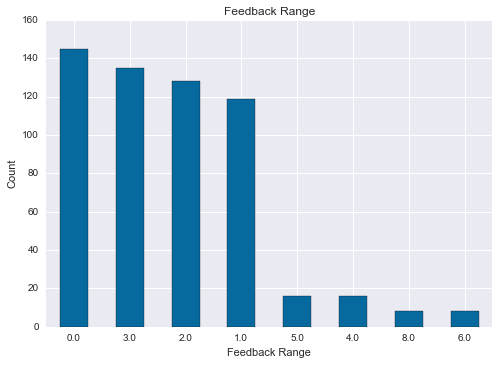

In [6]:
maxe = feedback.groupby(['Group'])['Feedback'].transform(max)
meen = feedback.groupby('Group')['Feedback'].transform('mean') 
minn = feedback.groupby(['Group'])['Feedback'].transform(min)
rang = feedback.groupby(['Group'])['Feedback'].transform(max) - \
feedback.groupby(['Group'])['Feedback'].transform(min)
FeedbackRange_perGroup = pd.concat([feedback['Group'], rang, meen,\
   feedback['Feedback']], axis =1, keys=['Group', 'Feedback_Range','Mean','Feedback'])
FeedbackRange_perGroup['Feedback_Range']

FeedbackRange_perGroup.Feedback_Range.value_counts().plot(kind='bar', color='#07699e', rot=0)
plt.xlabel('Feedback Range')
plt.ylabel('Count')
sns.despine()
plt.title('Feedback Range')

#Add as new feature - Could range be a measure of agreeability within a group? 
#Is there a relationship with Feedback Rating.
#FeedbackRange_perGroup['Range']

In [7]:
FeedbackRange_perGroup.head(10)

,Group,Feedback_Range,Mean,Feedback
0,100,3.0,7.000000,8.0
1,100,3.0,7.000000,NaN
2,100,3.0,7.000000,5.0
3,100,3.0,7.000000,NaN
4,100,3.0,7.000000,8.0
5,100,3.0,7.000000,NaN
6,100,3.0,7.000000,NaN
7,100,3.0,7.000000,NaN
8,101,3.0,9.166667,7.0
9,101,3.0,9.166667,NaN


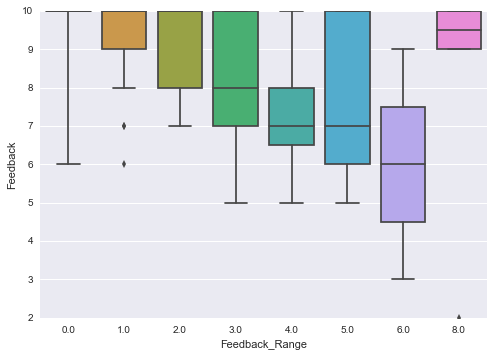

In [8]:
sns.boxplot(x='Feedback_Range', y="Feedback", data=FeedbackRange_perGroup)
#negative relationship? expected?

In [9]:
#Which groups had the greatest range?
feedback[FeedbackRange_perGroup['Feedback_Range'] > 3]

,ID,Group,Feedback,Gender,IndustryPre,IndustryPost,Motivation_InfluencePower,Motivation_Achievement,Motivation_PersonalRelationships,Motivation_Wealth,Motivation_IntellectualStimulation,Introspective,Partner,Country
40,40,105,NaN,Female,Investment Management|Finance and accounting,Consulting|Investment Banking,1.0,4.0,3.0,2.0,5.0,8.0,No,Canada
41,41,105,NaN,Male,Investment Banking,Private Equity / Venture Capital,5.0,3.0,1.0,4.0,2.0,8.0,No,Chile
42,42,105,NaN,Male,Technology / Internet / e-commerce,Investment Banking,5.0,2.0,3.0,4.0,1.0,9.0,No,India
43,43,105,NaN,Female,Entrepreneurship / Startups|Government / Milit...,Consulting|Entrepreneurship / Startups|Private...,1.0,2.0,3.0,5.0,4.0,8.0,No,Japan
44,44,105,NaN,Male,Consulting,Private Equity / Venture Capital,4.0,1.0,3.0,5.0,2.0,8.0,No,USA
45,45,105,NaN,Female,Healthcare / Biotech,Consulting|Entrepreneurship / Startups|Governm...,5.0,3.0,1.0,4.0,2.0,1.0,No,USA
46,46,105,9.0,Female,Consulting|CPG / Retail,CPG / Retail|Entrepreneurship / Startups|Trave...,4.0,2.0,1.0,5.0,3.0,9.0,No,USA
47,47,105,3.0,Male,Investment Banking|Investment Management|Priva...,Entrepreneurship / Startups|Technology / Inter...,5.0,4.0,1.0,2.0,3.0,7.0,No,USA
72,72,109,NaN,Female,Healthcare / Biotech|Technology / Internet / e...,Entrepreneurship / Startups|Healthcare / Biote...,2.0,3.0,1.0,5.0,4.0,7.0,No,China
73,73,109,NaN,Female,Consulting,Government / Military / Non-Profit|Private Equ...,4.0,1.0,2.0,3.0,5.0,7.0,No,England


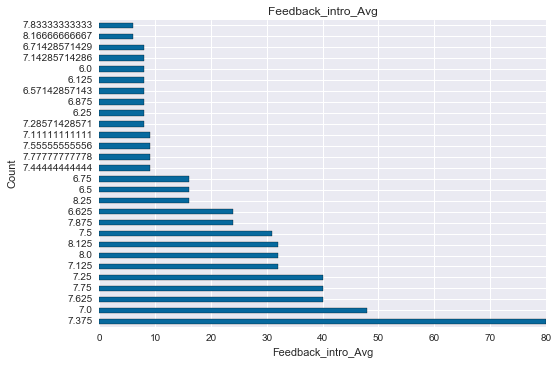

In [10]:
#Most Groups have an average introspectiveness score of 7.37,
#towards the higher end of the scale, 10 = most

AvgIntro_perGroup = feedback.groupby('Group')['Introspective'].transform('mean') 

AvgIntrospect_perGroup = pd.concat([feedback['Group'], AvgIntro_perGroup,\
                                    feedback['Feedback']], axis =1,\
                                   keys=['Group', 'Feedback_intro_Avg',\
                                         'Feedback'])
AvgIntrospect_perGroup['Feedback_intro_Avg']

AvgIntrospect_perGroup.Feedback_intro_Avg.value_counts().plot(kind='barh', \
                                     color='#07699e', rot=0)
plt.xlabel('Feedback_intro_Avg')
plt.ylabel('Count')
sns.despine()
plt.title('Feedback_intro_Avg')
#AvgIntrospect_perGroup

In [11]:
#Is there a pattern to missigness?

In [12]:
feedback[feedback['Country'].isnull()] #Missing Countries

,ID,Group,Feedback,Gender,IndustryPre,IndustryPost,Motivation_InfluencePower,Motivation_Achievement,Motivation_PersonalRelationships,Motivation_Wealth,Motivation_IntellectualStimulation,Introspective,Partner,Country
18,18,102,NaN,Male,Consulting|Energy,Entrepreneurship / Startups|Investment Banking...,5.0,4.0,1.0,2.0,3.0,3.0,No,NaN
139,139,117,NaN,Male,Investment Banking|Media & Entertainment,Entrepreneurship / Startups|Private Equity / V...,1.0,5.0,3.0,2.0,4.0,8.0,No,NaN
192,192,205,2.0,Male,Private Equity / Venture Capital|Technology / ...,Consulting|agriculture,5.0,3.0,2.0,1.0,4.0,1.0,No,NaN
240,240,211,NaN,Male,Technology / Internet / e-commerce,Entrepreneurship / Startups|Private Equity / V...,3.0,1.0,5.0,4.0,2.0,8.0,Yes,NaN
249,249,212,5.0,Male,Entrepreneurship / Startups|Government / Milit...,CPG / Retail|Entrepreneurship / Startups|Inves...,1.0,5.0,2.0,4.0,3.0,7.0,Yes,NaN
256,256,213,NaN,Female,Sales and Trading,Consulting|Entrepreneurship / Startups|Governm...,5.0,3.0,1.0,4.0,2.0,9.0,No,NaN
287,287,217,NaN,Male,Entrepreneurship / Startups,Private Equity / Venture Capital,5.0,2.0,1.0,4.0,3.0,9.0,No,NaN
429,429,317,10.0,Female,Financial Services,Entrepreneurship / Startups|Technology / Inter...,4.0,2.0,3.0,5.0,1.0,8.0,No,NaN
446,446,401,NaN,Female,CPG / Retail,Consulting|Entrepreneurship / Startups|Media &...,4.0,1.0,3.0,5.0,2.0,9.0,No,NaN


In [13]:
feedback[feedback['Introspective'].isnull()] 
#These 8 are also missing Motivation_[X] + Feedback,yet still have countries

,ID,Group,Feedback,Gender,IndustryPre,IndustryPost,Motivation_InfluencePower,Motivation_Achievement,Motivation_PersonalRelationships,Motivation_Wealth,Motivation_IntellectualStimulation,Introspective,Partner,Country
189,189,204,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,USA
332,332,305,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Germany
354,354,307,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,USA
395,395,313,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,China
396,396,313,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Germany
419,419,316,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Murica
486,486,406,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,USA
497,497,407,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,USA


In [14]:
feedback[feedback['Motivation_IntellectualStimulation'].isnull()] 
#Motivation_IntellectualStimulation also has an additional missing

,ID,Group,Feedback,Gender,IndustryPre,IndustryPost,Motivation_InfluencePower,Motivation_Achievement,Motivation_PersonalRelationships,Motivation_Wealth,Motivation_IntellectualStimulation,Introspective,Partner,Country
189,189,204,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,USA
332,332,305,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Germany
354,354,307,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,USA
395,395,313,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,China
396,396,313,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Germany
419,419,316,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Murica
486,486,406,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,USA
497,497,407,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,USA
518,518,410,NaN,Male,Consulting|Healthcare / Biotech,Consulting|Entrepreneurship / Startups|Healthc...,3.0,2.0,1.0,4.0,NaN,7.0,No,United Kingdom


Data Exploration

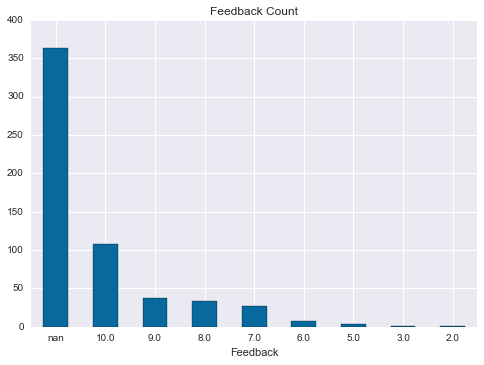

In [15]:
#What is the distribution of the response variable, feedback?
feedback.Feedback.value_counts(dropna=False).plot(kind='bar', color='#07699e', rot=0)
plt.xlabel('Feedback')
sns.despine()
plt.title('Feedback Count')

Over 100 responded with a Feedback rating of 10! 
But, most ratings are missing. Is there a pattern to those that are Na's?

In [16]:
feedback_nan = feedback[feedback['Feedback'].isnull()]
#subsetting dataset for rows where feedback is missing 

What does Motivation look like?

Let's compare Motivation_[X] and Feedback:

In [17]:
#Those who are most motivated by Wealth, are giving lower feedback. The lower whisker is extending
#lower than 4, even though the median is around 9 for rating of 2.

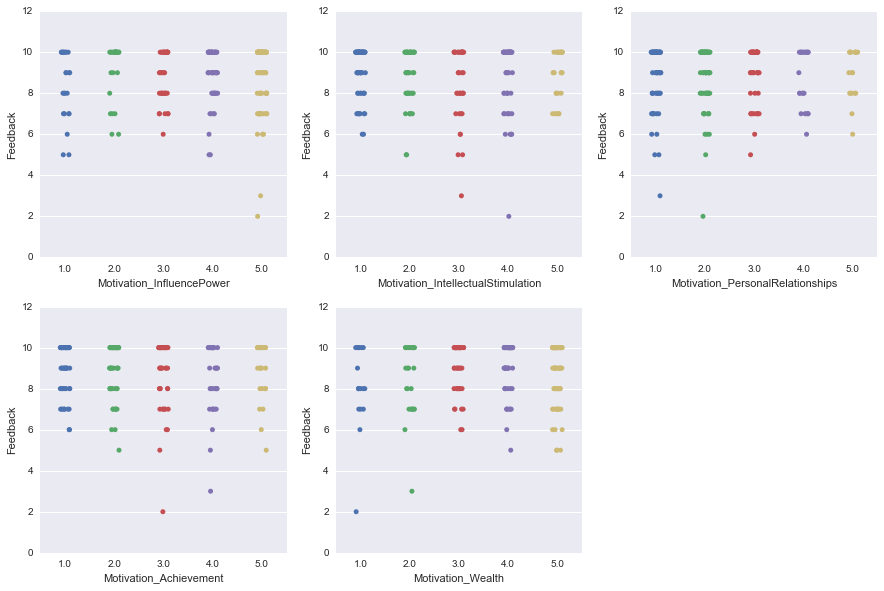

In [18]:
f, ax = plt.subplots(figsize=(15,15))
plt.subplot(3,3,1)
plt.axis([0,1,0,12])
sns.stripplot(x='Motivation_InfluencePower', y="Feedback", data=feedback,jitter=True)
plt.subplot(3,3,2)
plt.axis([0,1,0,12])
sns.stripplot(x='Motivation_IntellectualStimulation', y="Feedback", data=feedback,jitter=True)
plt.subplot(3,3,3)
plt.axis([0,1,0,12])
sns.stripplot(x='Motivation_PersonalRelationships', y="Feedback", data=feedback,jitter=True)
plt.subplot(3,3,4)
plt.axis([0,1,0,12])
ax = sns.stripplot(x='Motivation_Achievement', y="Feedback", data=feedback,jitter=True)
plt.subplot(3,3,5)
plt.axis([0,1,0,12])
ax = sns.stripplot(x='Motivation_Wealth', y="Feedback", data=feedback,jitter=True)
plt.show()

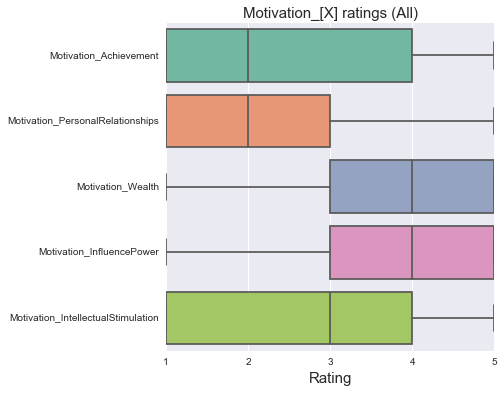

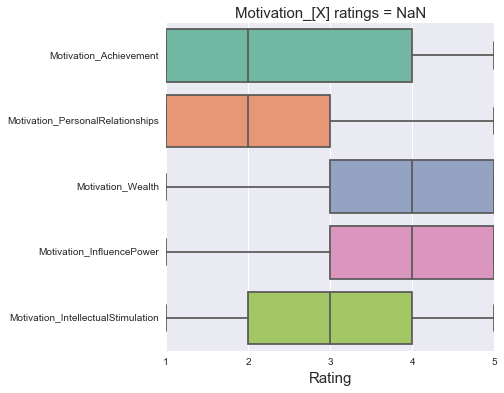

In [19]:
#Motivation_[X] ratings 
f, ax = plt.subplots(figsize=(20,20))
plt.subplot(3,3,1)
df1 = pd.concat([feedback['Motivation_Achievement'],
   feedback['Motivation_PersonalRelationships'],feedback['Motivation_Wealth'],
   feedback['Motivation_InfluencePower'],
   feedback['Motivation_IntellectualStimulation'],feedback['Gender']], axis =1)
xticks = np.arange(1, 6, 1)
plt.xticks(xticks)
plt.rcParams['figure.figsize'] = 8, 8
ax = sns.boxplot(data=df1, orient="h",palette="Set2")
plt.title('Motivation_[X] ratings (All)', fontsize = 15)
plt.xlabel('Rating', fontsize = 15)
plt.show()

#Motivation_[X] ratings where feedback is missing 
f, ax = plt.subplots(figsize=(20,20))
plt.subplot(3,3,2)
df1 = pd.concat([feedback_nan['Motivation_Achievement'],
   feedback_nan['Motivation_PersonalRelationships'],feedback_nan['Motivation_Wealth'],
   feedback_nan['Motivation_InfluencePower'],
   feedback_nan['Motivation_IntellectualStimulation'],feedback_nan['Gender']], axis =1)
xticks = np.arange(1, 6, 1)
plt.xticks(xticks)
plt.rcParams['figure.figsize'] = 8, 8
ax = sns.boxplot(data=df1, orient="h",palette="Set2")
plt.title('Motivation_[X] ratings = NaN', fontsize = 15)
plt.xlabel('Rating', fontsize = 15)
plt.show()

Missigness appears to be completely at random, just a random subset of the data.
The distribution of Country, Motivation is the same. Thus it makes sense to complete mean imputation. A continuous variable we will bucket into 2 outcomes (1,0).

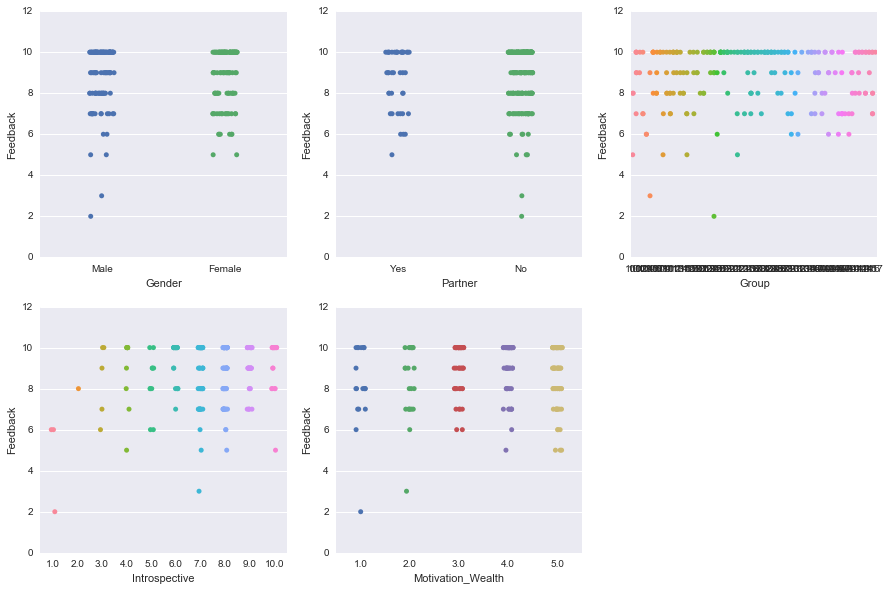

In [20]:
f, ax = plt.subplots(figsize=(15,15))
plt.subplot(3,3,1)
plt.axis([0,1,0,12])
sns.stripplot(x='Gender', y="Feedback", data=feedback,jitter=True)
plt.subplot(3,3,2)
plt.axis([0,1,0,12])
sns.stripplot(x='Partner', y="Feedback", data=feedback,jitter=True)
plt.subplot(3,3,3)
plt.axis([0,1,0,12])
sns.stripplot(x='Group', y="Feedback", data=feedback,jitter=True)
plt.subplot(3,3,4)
plt.axis([0,1,0,12])
ax = sns.stripplot(x='Introspective', y="Feedback", data=feedback,jitter=True)
plt.subplot(3,3,5)
plt.axis([0,1,0,12])
ax = sns.stripplot(x='Motivation_Wealth', y="Feedback", data=feedback,jitter=True)

plt.show()

mean score of Feedback=8.85
mean Introspective rating=7.36173913043


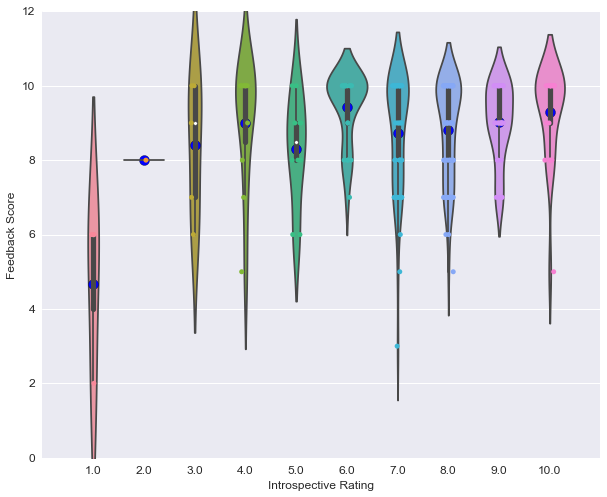

In [21]:
#A closer examination on Introspective-ness

group=feedback.groupby('Introspective')
rat_av=group.agg('mean')
rat_av['Introspective']=[1,2,3,4,5,6,7,8,9,10]

rat_av

Motivation_score_real=feedback.Introspective.mean() 
plt.figure(figsize=(10,8))

sns.violinplot(x=feedback.Introspective, y=feedback.Feedback, data=feedback)
sns.stripplot(x="Introspective", y="Feedback", data=feedback, jitter=True)
plt.scatter(rat_av.Introspective - 1,rat_av.Feedback,cmap=plt.cm.Blues,  
            s=100)
plt.ylim(0,12)
plt.xlim(-1,10)
plt.xlabel('Introspective Rating',fontsize=12)
plt.ylabel('Feedback Score',fontsize=12)

plt.xticks(size=12)
plt.yticks(size=12)

print('mean score of Feedback={}'.format(np.mean(feedback.Feedback)))
print('mean Introspective rating={}'.format(Motivation_score_real))

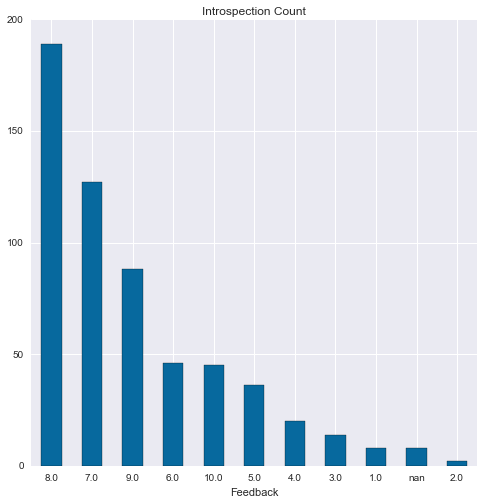

In [22]:
feedback.Introspective.value_counts(dropna=False).plot(kind='bar', color='#07699e', rot=0)
plt.xlabel('Feedback')
sns.despine()
plt.title('Introspection Count')

In [23]:
print len(feedback[feedback['Introspective'] == 1])/len(feedback['Introspective'])\
+len(feedback[feedback['Introspective'] == 2])/len(feedback['Introspective'])\
+len(feedback[feedback['Introspective'] == 3])/len(feedback['Introspective'])\
+len(feedback[feedback['Introspective'] == 4])/len(feedback['Introspective'])\
+len(feedback[feedback['Introspective'] == 5])/len(feedback['Introspective'])
print len(feedback[feedback['Introspective'] == 6])/len(feedback['Introspective'])
print len(feedback[feedback['Introspective'] == 7])/len(feedback['Introspective'])
print len(feedback[feedback['Introspective'] == 8])/len(feedback['Introspective'])
print len(feedback[feedback['Introspective'] == 9])/len(feedback['Introspective'])
print len(feedback[feedback['Introspective'] == 10])/len(feedback['Introspective'])

0.137221269297
0.0789022298456
0.217838765009
0.324185248714
0.150943396226
0.0771869639794


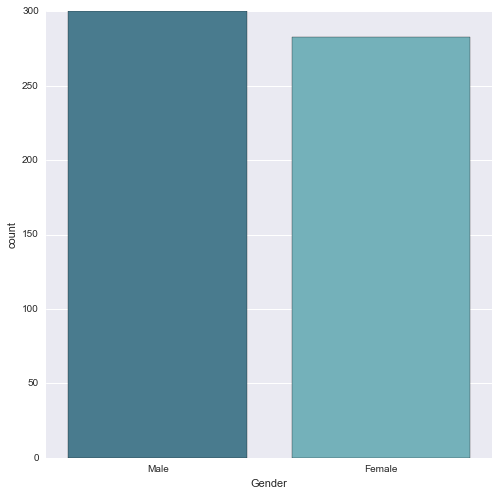

In [24]:
#Gender 
ax = sns.countplot(x="Gender", data=feedback, palette="GnBu_d")

In [25]:
#Gender proportions are about the same, let's see how they compare on motivation:

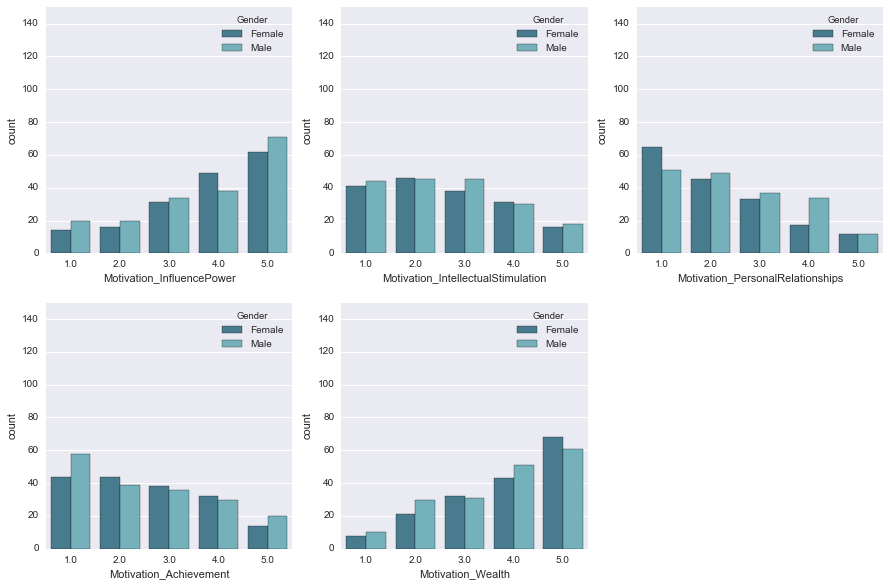

In [26]:
#Motivation Rations, split by Gender
f, ax = plt.subplots(figsize=(15,15))
plt.subplot(3,3,1)
plt.axis([0,1,0,150])
sns.countplot(x='Motivation_InfluencePower', hue='Gender', data=df1,palette="GnBu_d")
plt.subplot(3,3,2)
plt.axis([0,1,0,150])
sns.countplot(x='Motivation_IntellectualStimulation', hue='Gender', data=df1,palette="GnBu_d")
plt.subplot(3,3,3)
plt.axis([0,1,0,150])
sns.countplot(x='Motivation_PersonalRelationships', hue='Gender', data=df1,palette="GnBu_d")
plt.subplot(3,3,4)
plt.axis([0,1,0,150])
ax = sns.countplot(x='Motivation_Achievement', hue='Gender', data=df1,palette="GnBu_d")
plt.subplot(3,3,5)
plt.axis([0,1,0,150])
ax = sns.countplot(x='Motivation_Wealth', hue='Gender', data=df1,palette="GnBu_d")
plt.show()

In [27]:
#More individuals are ranking themselves as less motivated by influence,power, wealth.
#More indivudals are more motivated by achievement, personal relationships, intellectual stimulation
#More females are less motivated by wealth(rating of 5), then men are
#More females are more motivated by personal relationsips(rating of 1), then men are

Total Count of IndustryPost,Pre, disregarding that multiple could be selected per person

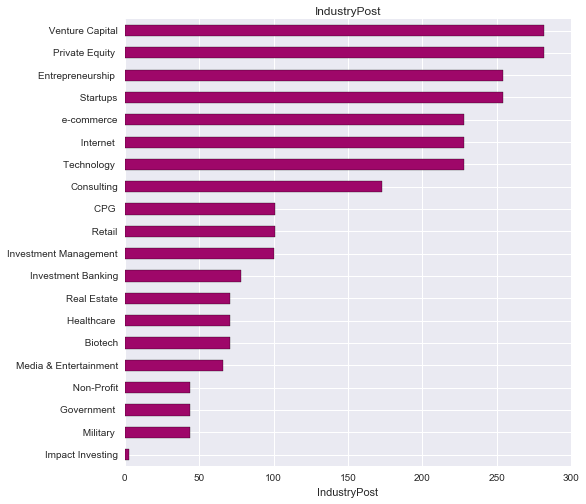

In [28]:
s = feedback['IndustryPost'].str.split('[/|]+').apply(Series, 1).stack() #('/|\|') takes 1st
s.index = s.index.droplevel(-1)
s.name = 'Industry'
d = pd.DataFrame(s)#
d['Industry'].value_counts().reset_index().head(5)

d['Industry'].value_counts().head(20).plot(kind='barh', color='#9e0769').invert_yaxis()
plt.xlabel('IndustryPost')
sns.despine()
plt.title('IndustryPost')
plt.rcParams['figure.figsize'] = 20, 15

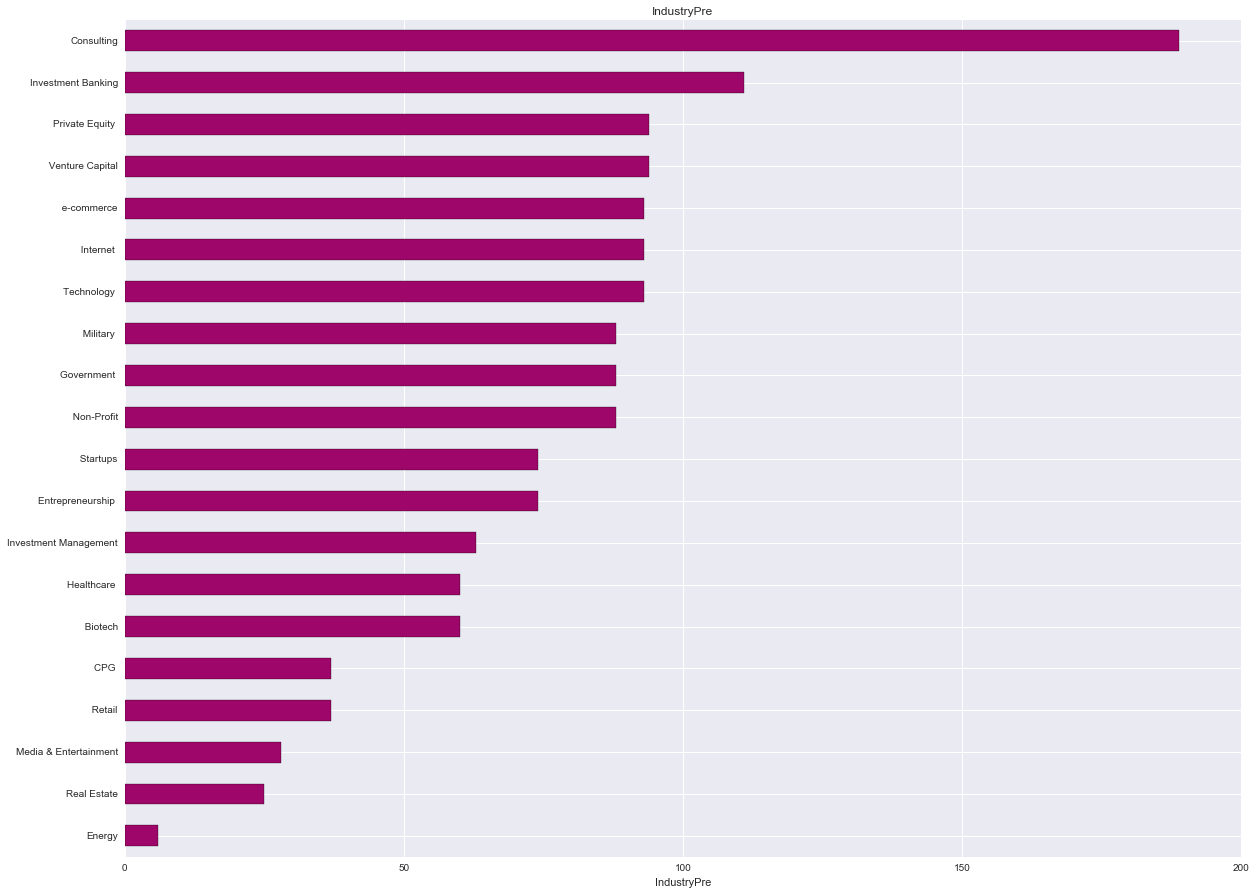

In [29]:
s = feedback['IndustryPre'].str.split('[/|]+').apply(Series, 1).stack() #('/|\|') takes 1st
s.index = s.index.droplevel(-1)
s.name = 'Industry'
d = pd.DataFrame(s)#
d['Industry'].value_counts().reset_index().head(5)

d['Industry'].value_counts().head(20).plot(kind='barh', color='#9e0769').invert_yaxis()
plt.xlabel('IndustryPre')
sns.despine()
plt.title('IndustryPre')
plt.rcParams['figure.figsize'] = 20, 15

Noticeable change in industry popularities
Consulting is no longer #1 from IndustryPre to IndustryPost
Startups, Retail, CPG increased in ranking
Non-Profit fell in ranking
Military fell in ranking 

Data Cleaning
1. Convert non-numeric binary variables into binary (0/1) variables

2. Convert categorical variables into dummy variables

3. Missigness: 
  Feedback: Impute with Group's feedback average
  IndustryPre: Impute with text, UnknownIndustryPre
  IndustryPost: Impute with text, UnknownIndustryPost
  Motivation: Impute with 0
  Introspective: Impute with 0
  Country: Impute with text, Unknown
  
4. New Features for Industry similarity between Pre and Post

In [30]:
feedback_ = pd.read_csv('feedback_clean.csv')

In [31]:
feedback_['Country'].unique()

array(['India', 'Kyrgyzstan', 'Macau', 'USA', 'Bangladesh', 'Brazil',
       'France', 'South Korea', nan, 'Canada', 'China', 'Ghana', 'Nigeria',
       'Korea', 'Chile', 'Japan', 'Philippines', 'Romania', 'Russia',
       'England', 'Peru', 'Korea ', 'Brazil ', 'Israel', 'Taiwan',
       'China ', 'Germany', 'Singapore', 'Armenia', 'United Arab Emirates',
       'Mexico', 'Austria', 'Iran', 'Slovakia', 'Spain', 'Australia',
       'Lebanon', 'Kenya', 'Dominican Republic', 'Zambia', 'Switzerland',
       'UK', 'Venezuela', 'Indonesia', 'Argentina', 'Bolivia',
       'South Africa', 'Pakistan', 'Hong Kong', 'Malaysia', 'china',
       'Vietnam', 'Colombia', 'Thailand', 'United Kingdom', 'Netherlands',
       'Murica ', 'Ecuador', 'Italy', 'Bahrain', 'Turkey', 'Jamaica',
       'Pakistan ', 'Egypt', 'Trinidad & Tobago', 'Ukraine', 'Ivory Coast',
       'The Netherlands'], dtype=object)

In [81]:
feedback_['Country'] = feedback_['Country'].str.strip()
feedback_['Country'][feedback_['Country'] == 'Murica'] = 'USA'
feedback_['Country'][feedback_['Country'] == 'china'] = 'China'
feedback_['Country'][feedback_['Country'] == 'Macau'] = 'China'
feedback_['Country'][feedback_['Country'] == 'Hong Kong'] = 'China'
feedback_['Country'][feedback_['Country'] == 'Taiwan'] = 'China'
feedback_['Country'][feedback_['Country'] == 'South Korea'] = 'Korea'
feedback_['Country'][feedback_['Country'] == 'UK'] = 'United Kingdom'

feedback_['ID'] = feedback_['ID'].apply(str)
#feedback_['Group'] = feedback_['Group'].apply(str)

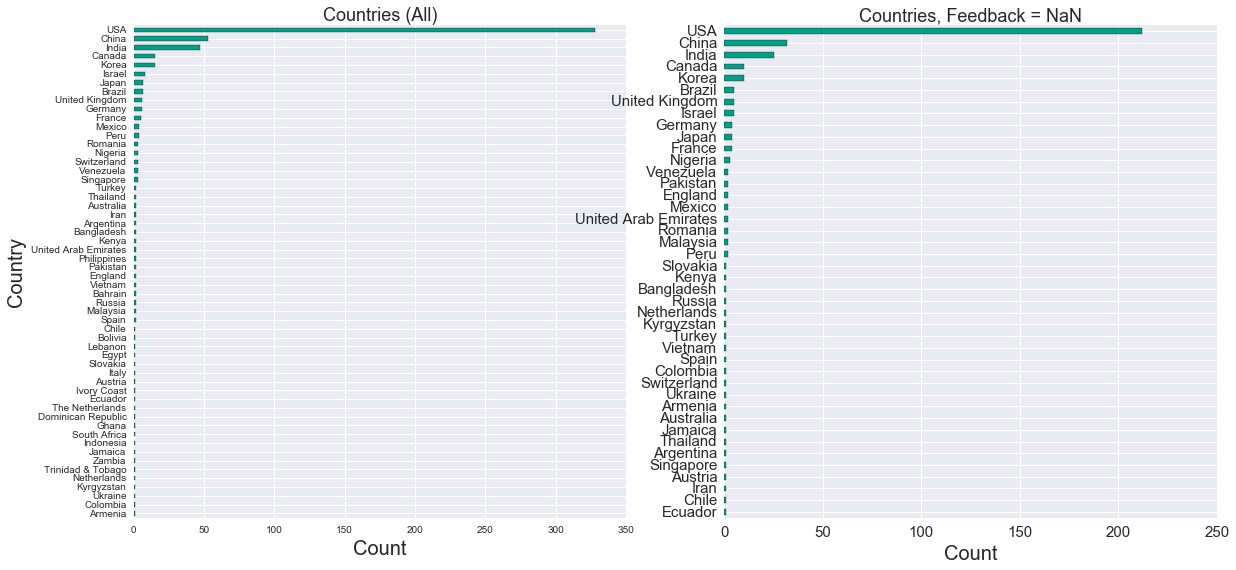

In [33]:
feedback_nan = feedback_[feedback_['Feedback'].isnull()]
#subsetting dataset for rows where feedback is missing 

f, ax = plt.subplots(figsize=(30,30))
#What is the distribution of Countries?
plt.subplot(3,3,1)
sns.set(font_scale=1.5)
plt.rcParams['figure.figsize'] = 10, 10
ax = feedback_.Country.value_counts().plot(kind="barh",color='#079e88').invert_yaxis()
plt.xlabel('Count', fontsize = 20)
plt.ylabel('Country', fontsize = 20)
plt.title('Countries (All)')

plt.subplot(3,3,2)
sns.set(font_scale=1.5)
plt.rcParams['figure.figsize'] = 10, 10
ax = feedback_nan.Country.value_counts().plot(kind="barh",color='#079e88').invert_yaxis()
plt.xlabel('Count', fontsize = 20)
plt.ylabel('', fontsize = 20)
plt.title('Countries, Feedback = NaN')

In [34]:
feedback_.drop(['ID','Feedback','IndustryPre','IndustryPost'],axis=1, inplace=True)
#try dropping Group
#feedback_.drop(['ID','Feedback','IndustryPre','IndustryPost','Group'],axis=1, inplace=True)

In [35]:
#0 imputation for Motivation

for column in feedback_:
    if column in ('Motivation_InfluencePower','Motivation_Achievement',\
                  'Motivation_PersonalRelationships', 'Motivation_Wealth', 
                      'Motivation_IntellectualStimulation','Introspective'):
        feedback_[column].fillna(0, inplace=True)
    elif column in ('Country'):
        feedback_[column].fillna('UnknownCountry', inplace=True)
        
print "preprocessing null data"

preprocessing null data


In [36]:
feedback_.columns

Index([u'Group', u'Gender', u'Motivation_InfluencePower',
       u'Motivation_Achievement', u'Motivation_PersonalRelationships',
       u'Motivation_Wealth', u'Motivation_IntellectualStimulation',
       u'Introspective', u'Partner', u'Country'],
      dtype='object')

In [37]:
feedback_.shape #(583, 15) #(583, 10)

(583, 10)

In [38]:
#throwing out Group 314 
feedback['Feedback'][feedback_['Group'] == 314] #8

403   NaN
404   NaN
405   NaN
406   NaN
407   NaN
408   NaN
409   NaN
410   NaN
Name: Feedback, dtype: float64

In [39]:
#Response Variable - remove here first
feedback = feedback[feedback_['Group'] != 314] 

In [40]:
FeedbackRange_perGroup.columns

Index([u'Group', u'Feedback_Range', u'Mean', u'Feedback'], dtype='object')

In [41]:
FeedbackRange_perGroup = FeedbackRange_perGroup[FeedbackRange_perGroup['Group'] != 314] 

In [42]:
feedback_ = feedback_[feedback_['Group'] != 314] 

In [43]:
feedback_[feedback_['Group'] == 314]

,Group,Gender,Motivation_InfluencePower,Motivation_Achievement,Motivation_PersonalRelationships,Motivation_Wealth,Motivation_IntellectualStimulation,Introspective,Partner,Country


In [44]:
feedback_.columns

Index([u'Group', u'Gender', u'Motivation_InfluencePower',
       u'Motivation_Achievement', u'Motivation_PersonalRelationships',
       u'Motivation_Wealth', u'Motivation_IntellectualStimulation',
       u'Introspective', u'Partner', u'Country'],
      dtype='object')

In [45]:
feedback_.iloc[400:410,0]  #314 should be gone

400    313
401    313
402    313
411    315
412    315
413    315
414    315
415    315
416    315
417    315
Name: Group, dtype: int64

In [46]:
feedback_['Group'] = feedback_['Group'].apply(str) #skipped earlier to impute

In [47]:
def preprocess_features(X):
    output = pd.DataFrame(index = X.index)
    for col, col_data in X.iteritems():     
        if col_data.dtype == object:
            col_data = col_data.replace(['Yes', 'No'], [1, 0])
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)  
        output = output.join(col_data)
    return output
feedback_ = preprocess_features(feedback_)
print "Processed feature columns ({} total features):\n{}".format(len(feedback_.columns), list(feedback_.columns))


Processed feature columns (138 total features):
['Group_100', 'Group_101', 'Group_102', 'Group_103', 'Group_104', 'Group_105', 'Group_106', 'Group_107', 'Group_108', 'Group_109', 'Group_110', 'Group_111', 'Group_112', 'Group_113', 'Group_114', 'Group_115', 'Group_116', 'Group_117', 'Group_118', 'Group_200', 'Group_201', 'Group_202', 'Group_203', 'Group_204', 'Group_205', 'Group_206', 'Group_207', 'Group_208', 'Group_209', 'Group_210', 'Group_211', 'Group_212', 'Group_213', 'Group_214', 'Group_215', 'Group_216', 'Group_217', 'Group_300', 'Group_301', 'Group_302', 'Group_303', 'Group_304', 'Group_305', 'Group_306', 'Group_307', 'Group_308', 'Group_309', 'Group_310', 'Group_311', 'Group_312', 'Group_313', 'Group_315', 'Group_316', 'Group_317', 'Group_400', 'Group_401', 'Group_402', 'Group_403', 'Group_404', 'Group_405', 'Group_406', 'Group_407', 'Group_408', 'Group_409', 'Group_410', 'Group_411', 'Group_412', 'Group_413', 'Group_414', 'Group_415', 'Group_416', 'Group_417', 'Gender_Female'

In [48]:
feedback_.head(2)

,Group_100,Group_101,Group_102,Group_103,Group_104,Group_105,Group_106,Group_107,Group_108,Group_109,...,Country_Trinidad & Tobago,Country_Turkey,Country_USA,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_UnknownCountry,Country_Venezuela,Country_Vietnam,Country_Zambia
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Response Variable

In [49]:
feedback.shape #(583, 14) #(575, 14)

(575, 14)

In [50]:
#feedback = feedback[feedback_['Group'] != 314] 

In [51]:
#feedback['Feedback'][feedback_['Group'] == 314] 

In [52]:
#Feedback 
#Replace NAs in Feedback with respectiveGroup Feedback Mean
mean = feedback.groupby('Group')['Feedback'].transform('mean') 
Feedbck = feedback['Feedback'].fillna(mean)

In [53]:
#Feedbck=Feedbck[Feedbck.notnull()] #Group 314's feedback is NA, throw it out
Feedbck[Feedbck.isnull()]

Series([], Name: Feedback, dtype: float64)

In [54]:
Feedbck.isnull().sum() #8 nulls

0

In [77]:
#Feedback - change multi-class to binary
Feedbck_new = Feedbck.reset_index()
Feedbck_new['Feedback'][Feedbck_new['Feedback'] < 6] = 0
Feedbck_new['Feedback'][Feedbck_new['Feedback'] > 5] = 1
Feedbck_new['Feedback'].head(3)

Industry Clean-up

In [78]:
#Replace Nulls for Industry
feedback.IndustryPre.fillna('UnknownIndustryPre', inplace=True)
feedback.IndustryPost.fillna('UnknownIndustryPost', inplace=True)
#Clean values in IndustryPre & IndustryPost
pre_tmp = feedback['IndustryPre'].str.split('[/|]+')
post_tmps = feedback['IndustryPost'].str.split('[/|]+')
#Create temporary lists tracking each unique individual and associated industrie(s)
prelizt = []
prewerd = []
for index,row in enumerate(pre_tmp[0:]):
    for word in row:
        prelizt.append(index)
        prewerd.append(word)
#word represents industry name
postlizt = []
postwerd = []
for index,row in enumerate(post_tmps[0:]):
    for word in row:
        postlizt.append(index)
        postwerd.append(word)
#Create temporary  
pre_list = pd.DataFrame({'RowNumber' : prelizt,'Word' : prewerd})
post_list = pd.DataFrame({'RowNumber' : postlizt,'Word' : postwerd})
#Loop through each row and join on industry name
ratio = []
for i in range(0,575):  #575
    pre_listt = pre_list[pre_list.RowNumber  == i]
    post_listt = post_list[post_list.RowNumber == i]
    result = pd.merge(pre_listt, post_listt, on='Word')
    #number of industries in IndustryPost may be greater than IndustryPre
    diff = len(post_listt)-len(pre_listt)
    if diff > 0:
        j = 'More'
    else:    
        j = len(result)/len(pre_listt) #fraction of industrie(s) IndustryPre individual 
        #has a continuing interest in to IndustryPost
    ratio.append(j) #append to ratio list
feedback['Industryratio'] = ratio
#0: IndustryPost and IndustryPre have no common industries
#1: IndustryPost and IndustryPre have exactly the same industries, no change
feedback.head(2)

In [80]:
#New Industryratio buckets
feedback['Industryratio'][feedback['Industryratio'] == 'More'] = 'Ind_More'
feedback['Industryratio'][feedback['Industryratio'] == 1] = 'Ind_100%'
feedback['Industryratio'][feedback['Industryratio'] == 0] = 'Ind_0%'
feedback['Industryratio'][feedback['IndustryPre'] == 'UnknownIndustryPre'] = 'UnknownIndustryPre'
feedback['Industryratio'][feedback['IndustryPost'] == 'IndustryPost'] = 'UnknownIndustryPost'
feedback['Industryratio'][(feedback['Industryratio'] > 0) & (feedback['Industryratio'] <= 0.50)] = 'Ind_0% to 50%'
feedback['Industryratio'][(feedback['Industryratio'] > 0.50) & (feedback['Industryratio'] < 1)] = 'Ind_50% to 100%'

In [58]:
#dummify
indus_ratio = pd.get_dummies(feedback.Industryratio)
indus_ratio.head(3)

,Ind_0%,Ind_0% to 50%,Ind_100%,Ind_50% to 100%,Ind_More,UnknownIndustryPre
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0


In [59]:
feedback_news = pd.concat([feedback_,indus_ratio, FeedbackRange_perGroup['Feedback_Range']],axis=1)
feedback_news.shape #(583, 155)..#(583, 144)

(575, 145)

In [60]:
print "Checking for NaN and Inf"
print "np.inf=", np.where(np.isnan(feedback_news))
print "is.inf=", np.where(np.isinf(feedback_news))

#should show nothing - sanity check

Checking for NaN and Inf
np.inf= (array([], dtype=int64), array([], dtype=int64))
is.inf= (array([], dtype=int64), array([], dtype=int64))


In [61]:
#feedback_news[feedback_news.isnull()].count()

Modeling

2.Analyze the effect of different variables on feedback score. Are there individual-level or group-level variables that predict high or low feedback score? How strong are these effects?

In [62]:
response = Feedbck_new['Feedback']

In [63]:
from sklearn.cross_validation import train_test_split
has_positive = pd.Series(response) #response
X_train, X_test, Y_train, Y_test = train_test_split(feedback_news,\
                                        has_positive,test_size=0.33,random_state=0)
print 'Train data set ratio: ', sum(Y_train)/float(X_train['Motivation_IntellectualStimulation'].count())
print 'Test data set ratio:  ', sum(Y_test)/float(X_test['Motivation_IntellectualStimulation'].count())

Train data set ratio:  0.987012987013
Test data set ratio:   0.994736842105


In [64]:
from sklearn import ensemble
randomForest = ensemble.RandomForestClassifier(n_jobs = -1, oob_score=True) #adding oob
import sklearn.grid_search as gs 
grid_para_forest = [{"n_estimators": [90], "criterion": ["gini"], 
                     'max_depth': [11], "min_samples_leaf": [3]}]

#n_estimators default is 10
#max_depth make this 20, default is none
#n_estimators, make this 10
#min_samples_leaf default is 1
#max_features keep auto

grid_search_forest = gs.GridSearchCV(randomForest, grid_para_forest, \
          cv=5, scoring='accuracy').fit(X_train, Y_train)
#5 fold cross validation used
print 'The best score is %.4f' %grid_search_forest.best_score_
print 'The best parameters are %s' %grid_search_forest.best_params_
print 'The training error is %.4f' %(1 - grid_search_forest.best_estimator_.score(X_train, Y_train))
print 'The testing error is %.4f' %(1 - grid_search_forest.best_estimator_.score(X_test, Y_test))

The best score is 0.9870
The best parameters are {'n_estimators': 90, 'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 3}
The training error is 0.0130
The testing error is 0.0053


In [65]:
forest_final = grid_search_forest.best_estimator_
feature_imprtance = zip(feedback_news.columns, forest_final.feature_importances_)
dtype = [('feature', 'S30'), ('importance', 'float')]
feature_imprtances = np.array(feature_imprtance, dtype = dtype)
feature_sort = np.sort(feature_imprtances, order='importance')[::-1]
feature_sort[0:15]

array([('Feedback_Range', 0.21072528482657596),
       ('Introspective', 0.10699472356014386),
       ('Motivation_Wealth', 0.08885000226824823),
       ('Motivation_PersonalRelationshi', 0.06597415118364547),
       ('Motivation_InfluencePower', 0.057200809579410344),
       ('Country_UnknownCountry', 0.0459766674284463),
       ('Motivation_IntellectualStimula', 0.045952459862893875),
       ('Group_105', 0.04328013154002019),
       ('Group_116', 0.040296605361763604),
       ('Country_China', 0.03927093095046568),
       ('Ind_More', 0.03491194886143033),
       ('Group_205', 0.03321744936603776),
       ('Motivation_Achievement', 0.03113021419288367),
       ('Group_109', 0.030315363213607664),
       ('Ind_0%', 0.023675492510266554)], 
      dtype=[('feature', 'S30'), ('importance', '<f8')])

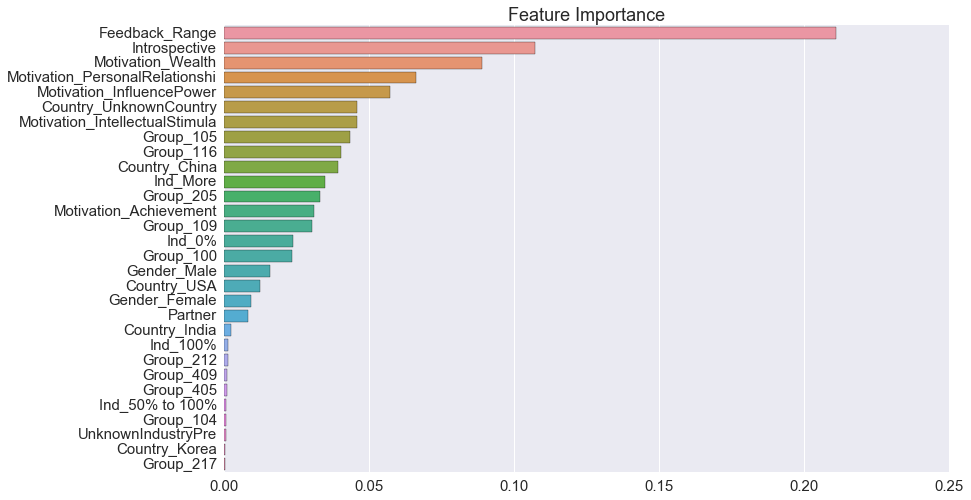

In [66]:
feature_sort_columns = [i for (i, j) in feature_sort[0:30]] 
plt.figure(figsize=(13, 8))
plt.title("Feature Importance")
importances = [j for (i, j) in feature_sort[0:30]] 
sns.barplot(y=feature_sort_columns, x=importances, ci=None)

Motivation features, Introspective and those changing their industries 0-50%, are the most important features

In [67]:
feedback_news.head(4)

,Group_100,Group_101,Group_102,Group_103,Group_104,Group_105,Group_106,Group_107,Group_108,Group_109,...,Country_Venezuela,Country_Vietnam,Country_Zambia,Ind_0%,Ind_0% to 50%,Ind_100%,Ind_50% to 100%,Ind_More,UnknownIndustryPre,Feedback_Range
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0


Gradient Boosting

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(max_features=10, n_estimators=200, 
                                 learning_rate=0.05, random_state= 2015)
gbm.fit(X_train, Y_train)

GradientBoostingClassifier(init=None, learning_rate=0.05, loss='deviance',
              max_depth=3, max_features=10, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=2015, subsample=1.0, verbose=0,
              warm_start=False)

In [74]:
import sklearn.metrics
print sklearn.metrics.roc_auc_score(Y_train, gbm.predict_proba(X_train)[:,1])
print sklearn.metrics.roc_auc_score(Y_test, gbm.predict_proba(X_test)[:,1])

1.0
0.883597883598


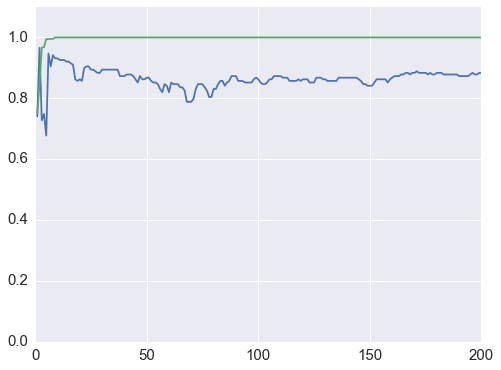

In [82]:
def plot_gbt_learning(gbt):
    test_score = np.empty(len(gbt.estimators_))
    train_score = np.empty(len(gbt.estimators_))
    for i, pred in enumerate(gbt.staged_predict_proba(X_test)):
         test_score[i] = sklearn.metrics.roc_auc_score(Y_test, pred[:,1])
    for i, pred in enumerate(gbt.staged_predict_proba(X_train)):
         train_score[i] = sklearn.metrics.roc_auc_score(Y_train, pred[:,1])
    plt.figure(figsize=(8,6))
    plt.plot(np.arange(gbt.n_estimators) + 1, test_score, label='Test') 
    plt.plot(np.arange(gbt.n_estimators) + 1, train_score, label='Train')
    plt.ylim(0,1.1)
plot_gbt_learning(gbm)

In [97]:
pos[-10:]

array([ 135.5,  136.5,  137.5,  138.5,  139.5,  140.5,  141.5,  142.5,
        143.5,  144.5])

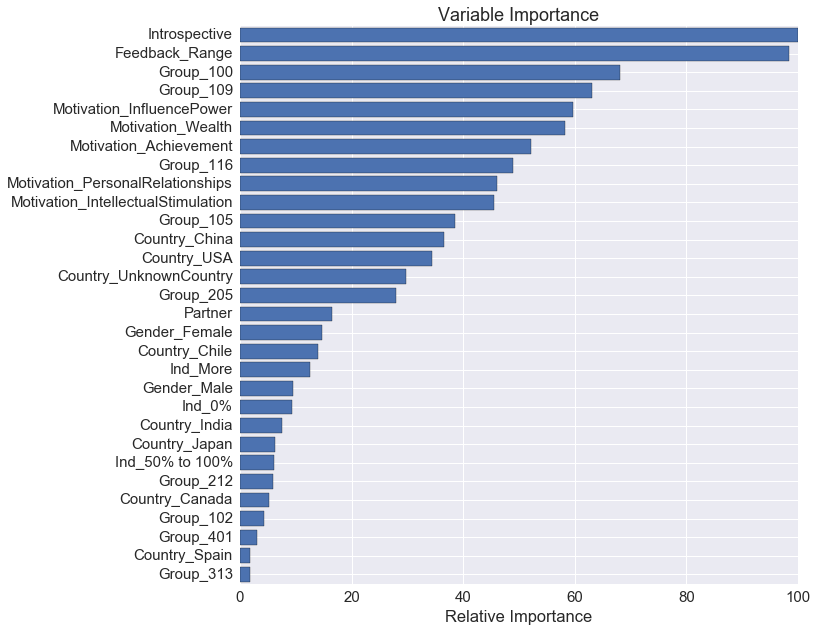

In [100]:
feature_importance = gbm.feature_importances_ 
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos[-30:], feature_importance[sorted_idx][-30:], align='center')
plt.yticks(pos[-30:], X_train.columns[[sorted_idx]][-30:])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.figure(figsize=(20,20))
plt.show()

In [72]:
#Group shows up often, 
#indicating that group the individual is in, is important - influences the feedback rating. 

3.What 1-2 high-level recommendations would you make for a future match in order to maximize feedback scores?